**Dataset:**
medicineData and wine-quality-white-and-red

**Introduction**

 to Unsupervised Machine Learning: Clustering

Unsupervised learning is a type of machine learning
where algorithms learn patterns from unlabeled data without
explicit guidance or supervision. Unlike supervised learning
(which predicts known outputs), unsupervised learning discovers
hidden patterns, structures, or relationships within data.

  **Key Characteristics of Unsupervised Learning:**

**No labels/target variables:** The data provided to unsupervised learning algorithms only consists of features or input variables, with no predefined output labels or target variables to guide the learning process.

**Exploratory:** The primary goal of unsupervised learning is often exploratory. It's used to discover unknown patterns, groupings, or structures within the data that might not be obvious through direct observation.

**Dimensionality reduction:** Unsupervised techniques can simplify complex data by reducing the number of variables (dimensions) while retaining important information, making data easier to visualize and analyze.

**Anomaly detection:** It's effective at identifying unusual patterns or outliers in data, which can be crucial for fraud detection, system monitoring, or quality control.


**1. Data Preparation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Create dataset
data = {
    "Weight_Index": [1, 2, 4, 5],
    "pH": [1, 1, 3, 4]
}

df = pd.DataFrame(data)
df

,Weight_Index,pH
0,1,1
1,2,1
2,4,3
3,5,4


**2.  Visualize the Data**

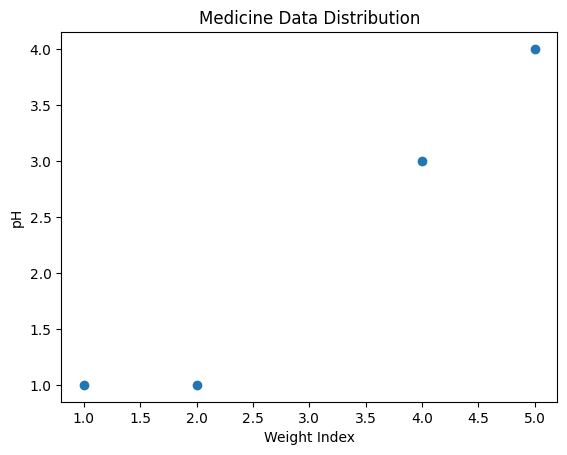

In [3]:
plt.scatter(df["Weight_Index"], df["pH"])
plt.xlabel("Weight Index")
plt.ylabel("pH")
plt.title("Medicine Data Distribution")
plt.show()


**3. K-Means Clustering**

In [4]:
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(df)
df

,Weight_Index,pH,Cluster
0,1,1,0
1,2,1,0
2,4,3,1
3,5,4,1


**4. Plot K-Means Result**

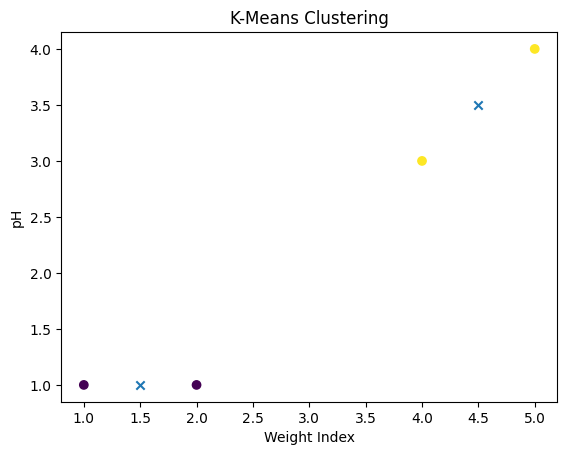

In [5]:
plt.scatter(df["Weight_Index"], df["pH"], c=df["Cluster"])
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='x'
)
plt.xlabel("Weight Index")
plt.ylabel("pH")
plt.title("K-Means Clustering")
plt.show()


**5. Hierarchical Clustering**

In [6]:
linked = linkage(df[["Weight_Index", "pH"]], method="ward")


**6. Plot Dendrogram**

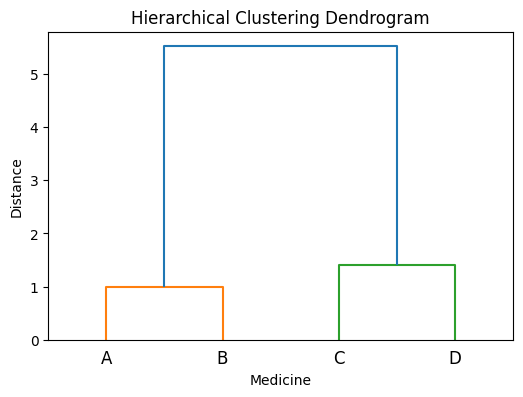

In [7]:
plt.figure(figsize=(6, 4))
dendrogram(linked, labels=["A", "B", "C", "D"])
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Medicine")
plt.ylabel("Distance")
plt.show()


**5. Comparison: K-Means vs Hierarchical**

| Feature | K-Means | Hierarchical |
|---------|---------|-------------|
| Needs number of clusters | Yes | No |
| Output | Fixed clusters | Tree structure |
| Best for | Large datasets | Small datasets |
| Interpretability | Medium | High |


Feature	K-Means	Hierarchical
Needs number of clusters	Yes	No
Output	Fixed clusters	Tree structure
Best for	Large datasets	Small datasets
Interpretability	Medium	High

**Summery**

Unsupervised learning was used because no labels were provided

Both K-Means and Hierarchical Clustering identified two natural clusters

Medicines were grouped based on Weight Index and pH

Hierarchical clustering provided a clear visual hierarchy

This approach is useful in drug formulation analysis and classification





**Unsupervised Machine Learning – Clustering**

**Dataset: Wine Quality (Red & White)**

**Introduction:**

 This program applies K-Means and Hierarchical Clustering

 to the wine-quality dataset. Since clustering is an

 unsupervised task, the target column 'quality' is removed.

 The categorical column 'type' (red/white) is encoded

 numerically before scaling and clustering.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

**Load the dataset**

In [ ]:
df = pd.read_csv("/content/wine-quality-white-and-red.csv")

print("Dataset shape:", df.shape)

Dataset shape: (6497, 13)


**Encode categorical column**

In [ ]:
if "type" in df.columns:
    le = LabelEncoder()
    df["type"] = le.fit_transform(df["type"])  # white=1, red=0

**Remove target column**

In [ ]:
if "quality" in df.columns:
    X = df.drop("quality", axis=1)
else:
    X = df.copy()

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**K-Means Clustering**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

**Hierarchical Clustering**

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3, linkage="ward")
hier_labels = hierarchical.fit_predict(X_scaled)

**PCA for Visualization**




In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Visualization: K-Means**

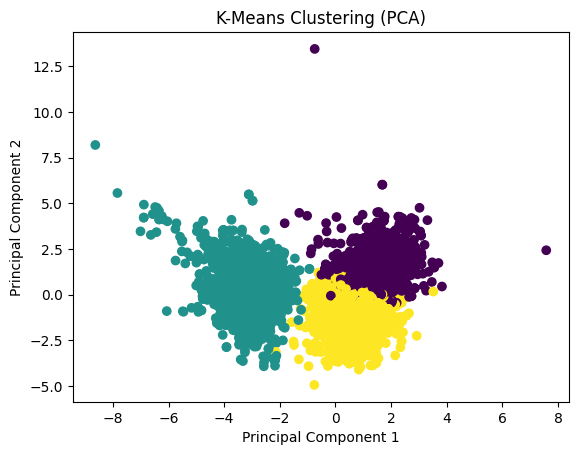

In [ ]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title("K-Means Clustering (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Visualization: Hierarchical**

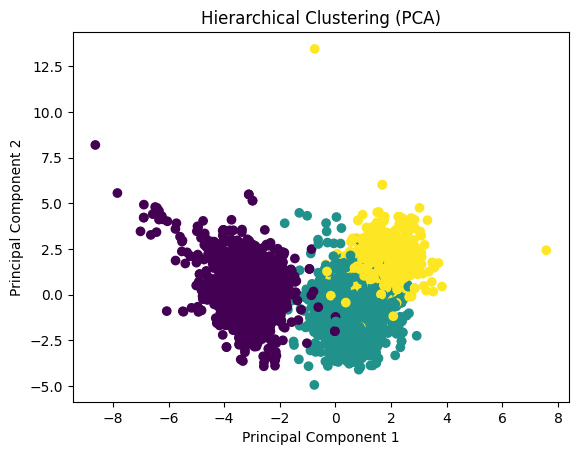

In [ ]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels)
plt.title("Hierarchical Clustering (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Summary:**

 The wine dataset was clustered using K-Means and

 Hierarchical Clustering after encoding categorical data

 and scaling features. Both techniques grouped wines into

 three clusters based on chemical properties. PCA helped

 visualize the cluster separation in two dimensions.